In [41]:
import sympy as sym
import matplotlib.pyplot as pl
import numpy as np

from scipy.signal import find_peaks
from IPython.display import display, Math

from sympy.abc import *


In [58]:
# 符號變數
x, y, z= sym.symbols('x, y, z')

# 函數
def f(x):
    y= 1 + x + x**2
    return y

def g(x):
    y= x**3
    return y

def h(x):
    #y= f(x) + g(x)
    #y= f(x) * g(x)
    y= f(g(x))
    return y

In [43]:
x

x

In [44]:
y

y

In [45]:
z

z

In [48]:
f(x)

x**2 + x + 1

In [49]:
g(y)


y**3

In [55]:
x

x

In [57]:
f(g(x))

x**6 + x**3 + 1

In [60]:
h(x)

x**6 + x**3 + 1

# sys.float_info
https://docs.python.org/3/library/sys.html#sys.float_info


In [155]:
#sys.float_info

'''
sys.float_info(
    max=1.7976931348623157e+308, 
    max_exp=1024, 
    max_10_exp=308, 
    min= 2.2250738585072014e-308,  ## 最小值 
    min_exp=-1021, 
    min_10_exp=-307, 
    dig=15, 
    mant_dig=53, 
    epsilon= 2.220446049250313e-16, ## 最小有差別的值?
    radix=2, 
    rounds=1)
'''
sys.float_info.epsilon, sys.float_info.min

In [182]:
#
# epsilon= 2.220446049250313e-16, ## 最小有差別的值?
#

all((
2.220446049250313e-16 == 2.220446049250313e-16,
2.220446049250313e-16 == 2.2204460492503130e-16,
2.220446049250313e-16 == 2.2204460492503131e-16,
2.220446049250313e-16 == 2.2204460492503132e-16, 
2.220446049250313e-16 == 2.2204460492503133e-16
)) 

True

In [209]:
all((
2.2250738585072014e-308 == 2.2250738585072014e-308,
2.2250738585072014e-308 == 2.22507385850720140e-308,
2.2250738585072014e-308 == 2.22507385850720141e-308,
2.2250738585072014e-308 == 2.22507385850720142e-308,
2.2250738585072014e-308 == 2.22507385850720143e-308,
2.2250738585072014e-308 == 2.22507385850720144e-308,
2.2250738585072014e-308 == 2.22507385850720145e-308,
2.2250738585072014e-308 == 2.22507385850720146e-308,
2.2250738585072014e-308 == 2.22507385850720147e-308,
2.2250738585072014e-308 == 2.22507385850720148e-308,
2.2250738585072014e-308 == 2.22507385850720149e-308,
2.2250738585072014e-308 == 2.22507385850720150e-308,
2.2250738585072014e-308 == 2.2250738585072013e-308,
2.2250738585072014e-308 == 2.2250738585072012e-308,
))

True

# 微分的觀念從這裡起跑...


In [273]:
# 微分的觀念從這裡起跑...

import sys

#  ϵ= sys.float_info.epsilon # 0^{+}

x, ϵ, dx= sym.symbols('x, ϵ, dx')

def f(t):
    y= t**4
    return y

f(x)

x**4

In [274]:
f(ϵ)

ϵ**4

In [275]:
f(dx) # 注意一下: d(x**4), (dx)**4 的分別

dx**4

In [276]:
(dx)**4  # 這個有定義，因為 dx 已視為一個符號變數

dx**4

In [277]:
d(x**4)  # 這個尚沒有定義，除非我們開始 定義 d(...)

TypeError: 'Symbol' object is not callable

In [278]:
# d(x**4) # 把 x**4 視為函數 f(x)， d(x**4) == d(f(x))

In [282]:
def f(t):
    y= t**4
    return y

f(x)

x**4

In [283]:
df= f(x+dx)-f(x)
df

-x**4 + (dx + x)**4

In [284]:
df/dx

(-x**4 + (dx + x)**4)/dx

In [285]:
sym.limit(df/dx, dx, 0)

4*x**3

In [287]:
h= (f(x+ϵ)-f(x))/ϵ
h.expand()

4*x**3 + 6*x**2*ϵ + 4*x*ϵ**2 + ϵ**3

In [288]:
sym.limit(h, ϵ, 0)

4*x**3

In [289]:
f(x).diff(x)

4*x**3

# use LaTex to write math

$
x, dx, f(), df()
$


```python
from sympy import Symbol, sin, cos, exp, log, limit
x=  Symbol('x')  # a variable, itself
dx= Symbol('dx') # a change of a variable named x

def f(t):
    f= 1 + t + t**2 + 2**t + sin(t) + + cos(t) + exp(t) + log(t)
    return f 

def df(f, t, dt):
    df= f(t+dt) - f(t)
    return df 
```


$
df(x) = f(x+dx) - f(x)
$

$
f'(x) 
\\
= \dot{f}(x)
\\
=\frac{d}{dx}(f(x))
\\
=\lim_{dx \to 0} \frac{df(x)}{dx} 
\\
=\lim_{dx \to 0} \frac{f(x+dx)-f(x)}{dx}
$

In [444]:
from sympy import Symbol, sin, cos, exp, log, limit

x=  Symbol('x')  # a variable, named x
dx= Symbol('dx') # a change of a variable named x

def f(t):
    y= 1 + t + t**2 + 2**t #+ sin(t) + cos(t) + exp(t) + log(t)
    return y 

def df(f, t, dt):
    dy= f(t+dt) - f(t)
    return dy 

In [445]:
y= f(x)
y

2**x + x**2 + x + 1

In [446]:
y1= f(x+dx)
y1

2**(dx + x) + dx + x + (dx + x)**2 + 1

In [447]:
dy= df(f,x,dx) # == f(x+dx)-f(x) # == y1-y
dy

-2**x + 2**(dx + x) + dx - x**2 + (dx + x)**2

In [448]:
dy/dx

(-2**x + 2**(dx + x) + dx - x**2 + (dx + x)**2)/dx

In [449]:
q1= limit(dy/dx, dx, 0)
q1

2**x*log(2) + 2*x + 1

In [450]:
q2= f(x).diff(x) # == y.diff(x)
q2

2**x*log(2) + 2*x + 1

In [451]:
q3= limit(
    (f(x+dx)-f(x))/dx, 
    dx, 
    0)
q3

2**x*log(2) + 2*x + 1

In [452]:
q1==q2, q2==q3

(True, True)

In [453]:
q1.simplify()==q2.simplify()

True

In [454]:
q1.simplify()==q3.simplify()

True

In [455]:
q2.simplify()==q3.simplify()

True

<IPython.core.display.Math object>

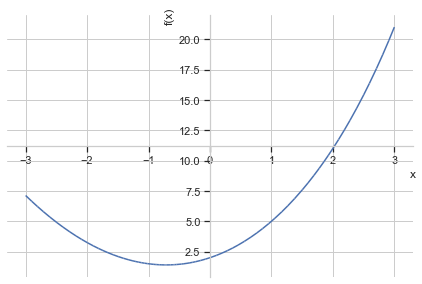

In [468]:
# 畫圖
import sympy as sm
import sympy.plotting as smplt


display(Math(
    f'f(x)= {sm.latex(f(x))}'
))

smplt.plot(f(x),(x,-3,3))

In [390]:
# Sum Rule
# Product Rule
# Quotient rule
# Power Rule
# Chain Rule
# Antiderivative
# Integrals
# The fundamental theorem of calculus
# Substitution rule
# Areas between curves
# Integration by parts
# Multivariable calculus
# Partial derivatives
# Chain rule (again)




$
f'(x) 
= \dot{f}(x)
=\frac{d}{dx}(f(x))
$


$
df(x) 
= f(x+dx) - f(x)
\\
= f'(x) dx
\\
= \frac{df}{dx} dx
$

$
df(x,y) 
= f(x+dx, y+dy) - f(x,y)
\\
= 
\frac{\partial f}{\partial x} dx
+
\frac{\partial f}{\partial y} dy
$

In [520]:
# Multivariable calculus
# Chain rule (again)
import sympy as sm

x, y, dx, dy= sm.symbols('x, y, dx, dy')

def f(x,y):
    z= x**2 + x*y + y**2
    return z

In [522]:
z= f(x,y)
z

x**2 + x*y + y**2

In [525]:
zx= z.diff(x)
zx

In [527]:
zy= z.diff(y)
zy

x + 2*y

In [528]:
dz= f(x+dx, y+dy) -f(x,y)
dz

-x**2 - x*y - y**2 + (dx + x)**2 + (dx + x)*(dy + y) + (dy + y)**2

In [532]:
sm.limit(
(dz/dx).subs(dy,0),
dx,0)

2*x + y

In [533]:
z.diff(x)

2*x + y

In [535]:
z.diff(x) * dx + z.diff(y) *dy

dx*(2*x + y) + dy*(x + 2*y)

In [538]:
dz.subs(dx,0)/dy

(-x*y + x*(dy + y) - y**2 + (dy + y)**2)/dy

In [540]:
s= '''
\\frac
{\\partial f(x,y)}
{\\partial x}
'''
Math(s)

<IPython.core.display.Math object>

In [541]:
s= sm.latex(
    f(x,y).diff(x))
Math(s)

<IPython.core.display.Math object>

In [545]:
f= sm.Function('f')
f(u)

f(u)

In [551]:
(2**f(u)).diff(u)

2**f(u)*log(2)*Derivative(f(u), u)

In [552]:
f?

Init signature: f(*args)
Docstring:     
Base class for expressions resulting from the application of an undefined
function.
File:           m:\programdata\anaconda3\lib\site-packages\sympy\core\function.py
Type:           UndefinedFunction
Subclasses:     


In [489]:

sm.limit(
(f(x+dx, y) -f(x, y))/dx,
dx, 0)

2*x + y

In [553]:
f

f

In [490]:
sm.limit(
(f(x, y+dy) -f(x, y))/dy,
dy, 0)

x + 2*y

In [491]:
f(x,y).diff(x)

2*x + y

In [492]:
f(x,y).diff(y)

x + 2*y

In [499]:
df1= f(x,y).diff(x) * dx + f(x,y).diff(y) * dy
df1

dx*(2*x + y) + dy*(x + 2*y)

In [500]:
df2= f(x+dx, y+dy)-f(x,y)
df2

-x**2 - x*y - y**2 + (dx + x)**2 + (dx + x)*(dy + y) + (dy + y)**2

In [508]:
sm.limit(df1, dx,0).simplify(), sm.limit(df2, dx,0).simplify()


(dy*(x + 2*y), dy*(dy + x + 2*y))

In [509]:
sm.limit(df1, dy,0).simplify(), sm.limit(df2, dy,0).simplify()


(dx*(2*x + y), dx*(dx + 2*x + y))

In [457]:
# 為了 美化，劃出格子點
# https://stackoverflow.com/questions/44369537/how-to-display-grid-on-plot-in-sympy
import seaborn as sns
sns.set()
sns.set_style("whitegrid") #, {'grid.linestyle': '--'})



<IPython.core.display.Math object>

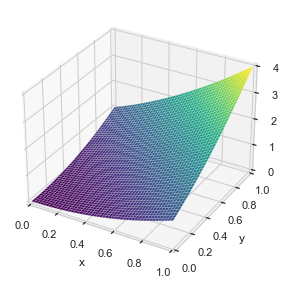

In [519]:
# 畫 z= f(x,y)

x,y= sm.symbols('x,y')

#z= x+y

def f(x,y):
    z= (x+y)**2 #x**2 + 2*x*y +y**2
    return z

z= f(x,y)

display(Math(f'z= {z}'))

smplt.plot3d(z, 
             (x,0,1),
             (y,0,1), 
             xlabel= 'x', 
             ylabel= 'y')

<IPython.core.display.Math object>

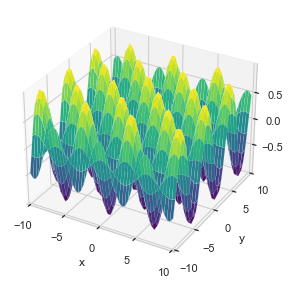

In [441]:
z= z.diff(x)

display(Math(f'z= {z}'))

smplt.plot3d(z, 
             (x,-10,10),
             (y,-10,10), 
             xlabel= 'x', 
             ylabel= 'y')

<IPython.core.display.Math object>

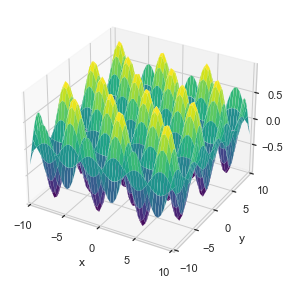

In [442]:
z= z.diff(x)

display(Math(f'z= {z}'))

smplt.plot3d(z, 
             (x,-10,10),
             (y,-10,10), 
             xlabel= 'x', 
             ylabel= 'y')


# Chain Rule

In [20]:
def f(x):
    y= 1 + x + x**2
    return y

def g(x):
    y= x**3
    return y

display(f(s))
display(g(t))

s**2 + s + 1

t**3

In [23]:
f(s)*g(s)

s**3*(s**2 + s + 1)

In [27]:
f(s)/g(s)

(s**2 + s + 1)/s**3

In [24]:
f(g(s))

s**6 + s**3 + 1

In [25]:
g(f(s))

(s**2 + s + 1)**3

$$
F(s)= f(g(s))
\\
\frac
{\partial f}
{\partial g}
\cdot
\frac
{\partial g}
{\partial s}
$$



In [35]:
f(s)

s**2 + s + 1

In [33]:
F= f(g(s))
F

s**6 + s**3 + 1

In [34]:
F.diff(s)

6*s**5 + 3*s**2


### Computing the area between two functions

The area between two functions is given by the formula 

$
A = \int_{a}^{b}f(x) - g(x) dx
$

In our example, 
$
f(x)=x^2
$,  
and 
$
g(x)=x
$

Therefore, 
$
A = \int_{a}^{b}(x^2 - x) dx
$

We will compute the area between the two crossing points, that is, where the two functions are equal. This is given by the two solutions to the equation

$$x^2=x$$

The two solutions are $x=0$ and $x=1$. This gives us the definite integral of

$$A = \int_{0}^{1}(x^2 - x) dx$$

The final answer will be given in the code below.

In [36]:
f(x)

x**2 + x + 1

In [37]:
g(x)

x**3

In [38]:
f(g(x))

x**6 + x**3 + 1

In [40]:
g(f(x)).expand()

x**6 + 3*x**5 + 6*x**4 + 7*x**3 + 6*x**2 + 3*x + 1